# Conv Model

In [88]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

In [89]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash
0,1.0000,0.0000,1.0,0.0
1,0.9995,0.1798,1.0,0.0
2,0.9985,0.5389,1.0,0.0
3,0.9970,1.0757,1.0,0.0
4,0.9950,1.7884,1.0,0.0


In [170]:
df.describe()
#print(df[58:116])


,IR,FlowHt,Sand,Ash
count,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500
std,0.250962,23.804094,0.292666,0.292666
min,0.173500,0.000000,0.100000,0.000000
25%,0.527000,5.900000,0.362500,0.212500
50%,0.789750,8.882400,0.550000,0.450000
75%,0.947500,15.364700,0.787500,0.637500
max,1.000000,98.685300,1.000000,0.900000


(1.041325, 0.0)

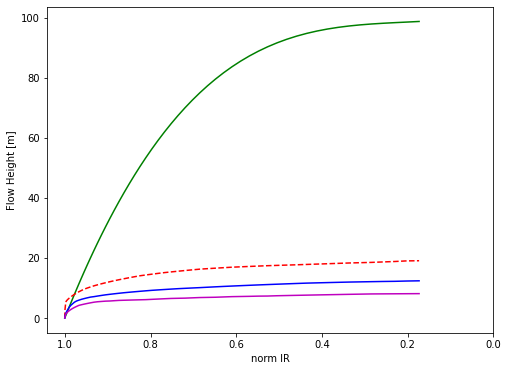

In [91]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [92]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

4

In [93]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash
count,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500
std,0.250962,23.804094,0.292666,0.292666
min,0.173500,0.000000,0.100000,0.000000
25%,0.527000,5.900000,0.362500,0.212500
50%,0.789750,8.882400,0.550000,0.450000
75%,0.947500,15.364700,0.787500,0.637500
max,1.000000,98.685300,1.000000,0.900000


,IR,FlowHt,Sand,Ash
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,5.206563e-16,1.025999e-15,-4.594026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-7.652509e-01,-1.580300e+00,-1.494878e+00
25%,-7.680453e-01,-5.173944e-01,-6.833730e-01,-7.687946e-01
50%,2.789270e-01,-3.921051e-01,-4.271081e-02,4.271081e-02
75%,9.075088e-01,-1.197864e-01,7.687946e-01,6.833730e-01
max,1.116704e+00,3.380477e+00,1.494878e+00,1.580300e+00


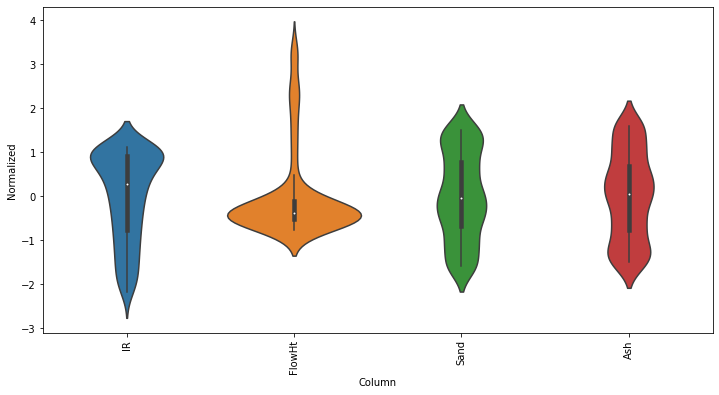

In [94]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()

In [95]:
# data
df_org = df
#df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [96]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash
count,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500
std,0.250962,23.804094,0.292666,0.292666
min,0.173500,0.000000,0.100000,0.000000
25%,0.527000,5.900000,0.362500,0.212500
50%,0.789750,8.882400,0.550000,0.450000
75%,0.947500,15.364700,0.787500,0.637500
max,1.000000,98.685300,1.000000,0.900000


Text(0, 0.5, 'Flow Height [m]')

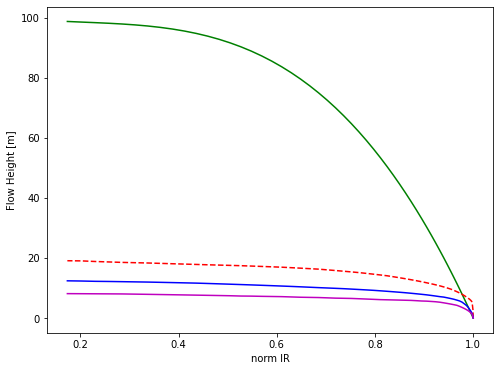

In [97]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([plt.xlim()[1], -2.5])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])



### curve_0

In [98]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [99]:
#m1 = int(n*0.2)
m1 = int(len(curve_0))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_0 = crv_0[0:int(m*0.8)]
    val_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
#    exec(f'test_df_0{i-1} = test_df_0')


In [100]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
#test_total = [test_df_00, test_df_01, test_df_02]

#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


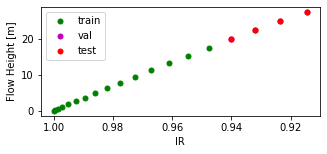

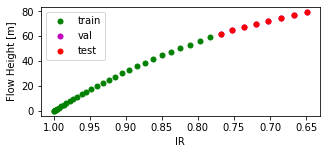

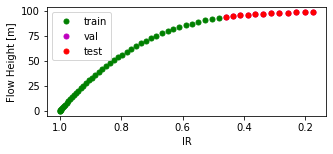

In [101]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)


### curve_1

In [102]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [103]:
m1 = int(len(curve_1))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.8)]
    val_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')

In [104]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : val_t_1}
ttt_1 = pd.DataFrame(ttt_1)

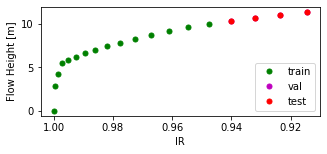

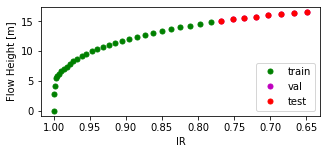

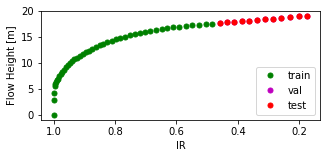

In [105]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_2

In [106]:
crv_2 = curve_2.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [107]:
m1 = int(len(curve_2))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.8)]
    val_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')

In [108]:
train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : val_t_2}
ttt_2 = pd.DataFrame(ttt_2)

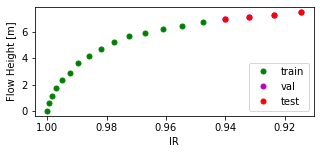

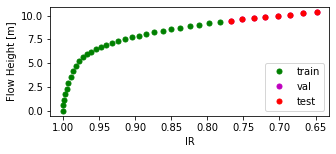

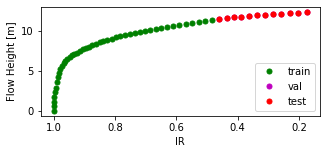

In [109]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

### curve_3

In [110]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [111]:
m1 = int(len(curve_3))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')

In [112]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : val_t_3}
ttt_3 = pd.DataFrame(ttt_3)

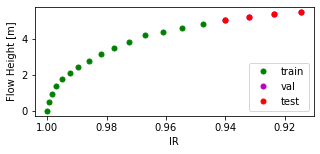

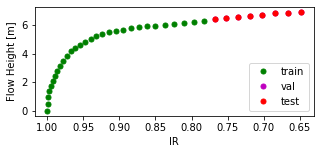

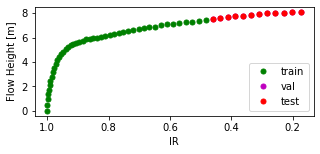

In [113]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)


#### WindowGrerator Class
#### WinGen()

In [114]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [115]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [116]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [117]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [118]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [119]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [120]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

### Convolution Model

In [121]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [122]:

_ = compile.compile_2(conv_model)

In [123]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []

Epoch 1/100
1/1 [==============================] - 0s 109ms/step - loss: 91.8372 - mean_absolute_error: 7.9677 - val_loss: 758.7320 - val_mean_absolute_error: 27.5451
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 90.1203 - mean_absolute_error: 7.8877 - val_loss: 744.0527 - val_mean_absolute_error: 27.2773
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 88.4054 - mean_absolute_error: 7.8072 - val_loss: 729.4601 - val_mean_absolute_error: 27.0085
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 86.6859 - mean_absolute_error: 7.7255 - val_loss: 715.0376 - val_mean_absolute_error: 26.7402
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 84.9663 - mean_absolute_error: 7.6426 - val_loss: 700.6858 - val_mean_absolute_error: 26.4705
Epoch 6/100
1/1

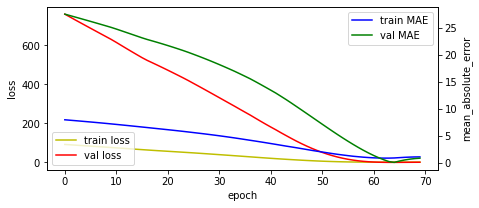

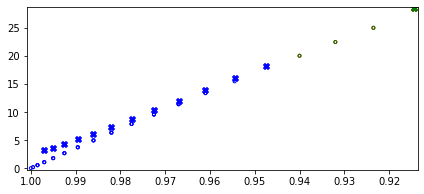

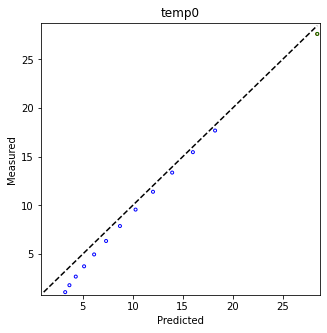

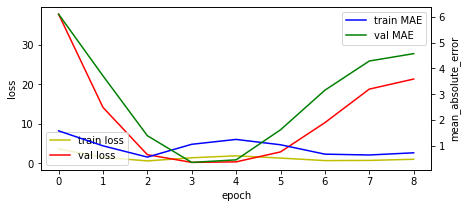

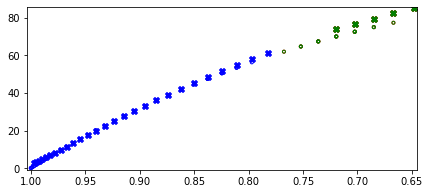

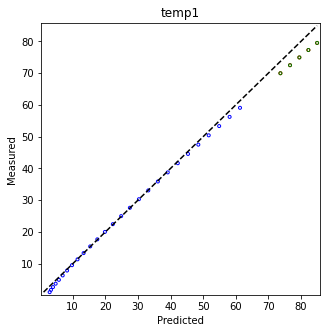

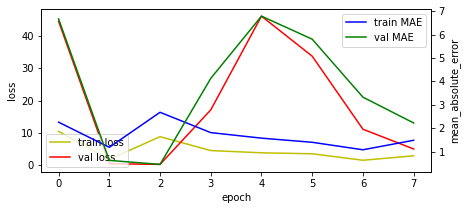

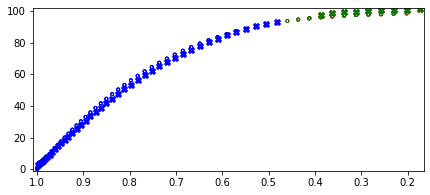

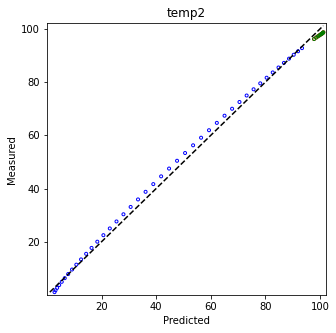

In [124]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt, window=conv_window,
            window_t=conv_window_t, model=conv_model, npat= 5,
                      num_epoch=100, add_num=0, df_name='temp')
        #     window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100 )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve0 -----------------')


In [125]:
#conv_window_t.plot_batch(conv_model, dset_name='train', n_batch=10, figures=0)
#conv_window_t.plot_batch(conv_model, 'train', n_batch=1, figures='True', xy_fig='True')
#conv_window_t.plot_batch(conv_model, 'val', n_batch=10,   xy_fig='True')
#conv_window_t.plot_batch(conv_model, 'train', n_batch=2 )

In [126]:
#conv_window_t.plot_xy(conv_model,  n_batch=10 )
#plt.gca().set_title('Curve 0')

Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 3.0918 - mean_absolute_error: 1.7110 - val_loss: 4.1362 - val_mean_absolute_error: 2.0338
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 3.0487 - mean_absolute_error: 1.6993 - val_loss: 4.0429 - val_mean_absolute_error: 2.0107
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 2.9716 - mean_absolute_error: 1.6781 - val_loss: 3.9197 - val_mean_absolute_error: 1.9798
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 2.8621 - mean_absolute_error: 1.6475 - val_loss: 3.7720 - val_mean_absolute_error: 1.9422
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 2.7242 - mean_absolute_error: 1.6081 - val_loss: 3.5755 - val_mean_absolute_error: 1.8909
Epoch 6/100
1/1 [========

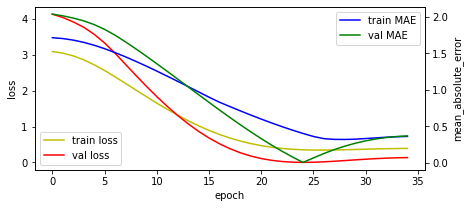

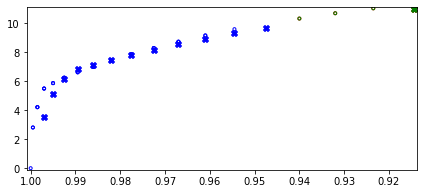

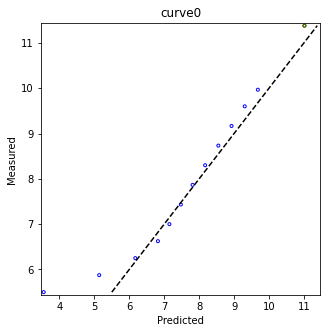

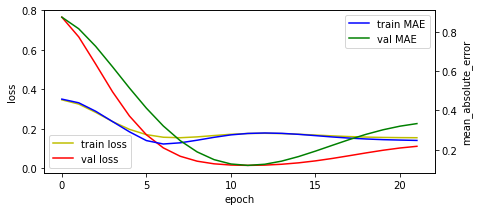

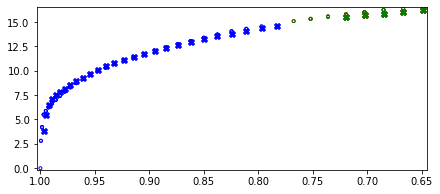

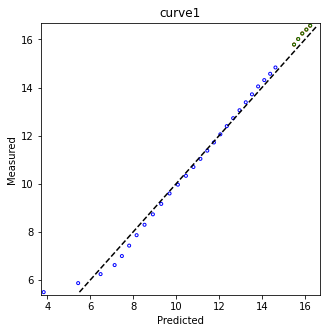

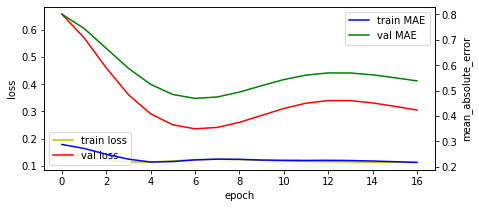

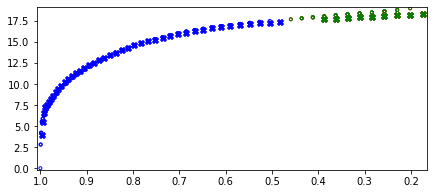

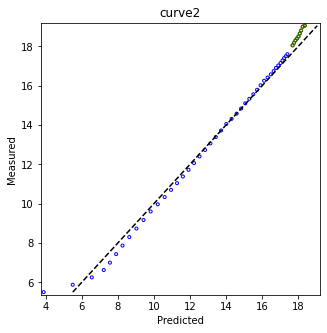

In [127]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_1, window=conv_window,
          window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=100, add_num=0, df_name='curve')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve1 -----------------')

In [128]:
conv_window_t.train_df = train_df_02
dataset = conv_window.train
n = 1
for batch in dataset :
  inputs, targets = batch
  print(f'Inputs shape (batch, time, features): {inputs.shape}')
  print(f'Labels shape (batch, time, features): {targets.shape}')
  #plot_3(inputs, targets, 8, n)
  n += 1

Inputs shape (batch, time, features): (16, 3, 4)
Labels shape (batch, time, features): (16, 1, 1)
Inputs shape (batch, time, features): (16, 3, 4)
Labels shape (batch, time, features): (16, 1, 1)
Inputs shape (batch, time, features): (11, 3, 4)
Labels shape (batch, time, features): (11, 1, 1)


Text(0.5, 1.0, 'Curve 1')

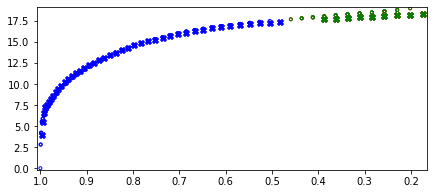

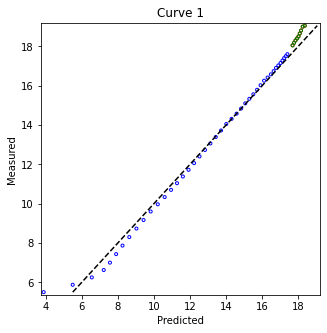

In [129]:
conv_window_t.train_df = train_df_12

conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 1')

In [130]:
'''
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_2, window=conv_window,
        window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=200, add_num=0, df_name='temp')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve2 -----------------')

'''

"\ntrain_loss_con, val_loss_con, train_mae_con, val_mae_con =      plots_t.add_curve(curve=ttt_2, window=conv_window,\n        window_t=conv_window_t, model=conv_model, npat= 10, num_epoch=200, add_num=0, df_name='temp')\ntr_loss_con = tr_loss_con + train_loss_con\nva_loss_con = va_loss_con + val_loss_con\ntr_mae_con = tr_mae_con + train_mae_con\nva_mae_con = va_mae_con + val_mae_con\n\nprint(f'End of curve2 -----------------')\n\n"

In [131]:
'''
#conv_window_t.train_df = ttt_2.iloc[3]['tr']
conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 2')

'''








"\n#conv_window_t.train_df = ttt_2.iloc[3]['tr']\nconv_window_t.plot_xy(conv_model,  n_batch=10 )\nplt.gca().set_title('Curve 2')\n\n"

Epoch 1/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.1322 - val_loss: 0.1042 - val_mean_absolute_error: 0.3227
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0204 - mean_absolute_error: 0.1279 - val_loss: 0.1032 - val_mean_absolute_error: 0.3212
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0187 - mean_absolute_error: 0.1201 - val_loss: 0.1014 - val_mean_absolute_error: 0.3184
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0165 - mean_absolute_error: 0.1082 - val_loss: 0.0984 - val_mean_absolute_error: 0.3137
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0954 - val_loss: 0.0937 - val_mean_absolute_error: 0.3062
Epoch 6/100
1/1 [========

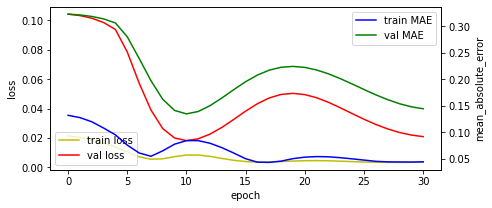

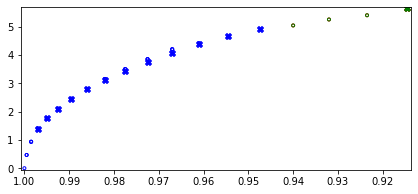

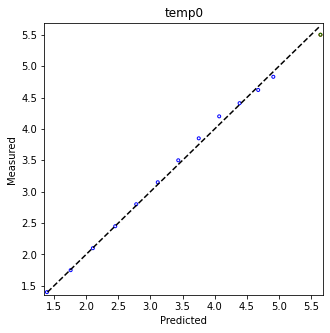

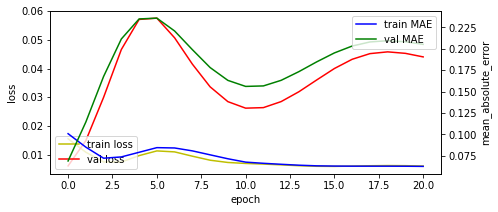

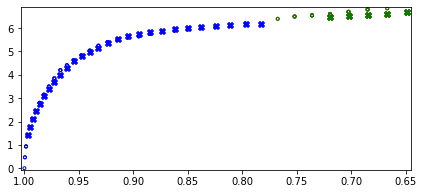

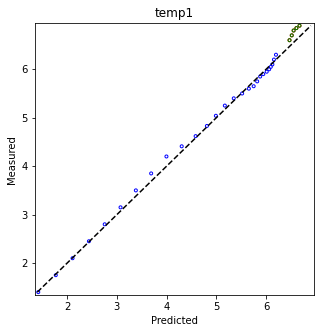

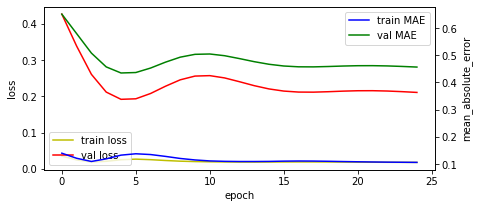

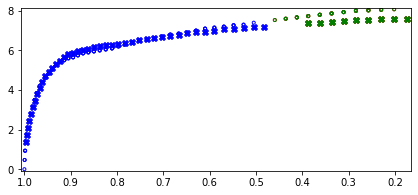

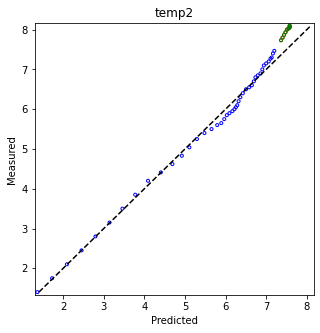

In [132]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con =  \
    plots_t.add_curve(curve=ttt_3, window=conv_window,
                                window_t=conv_window_t, model=conv_model, npat= 20,
                      num_epoch=100, add_num=0 , df_name='temp')
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

print(f'End of curve3 -----------------')

Text(0.5, 1.0, 'Curve 3')

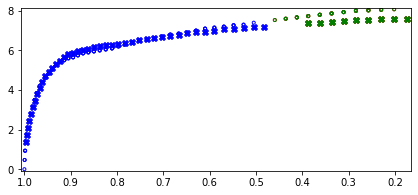

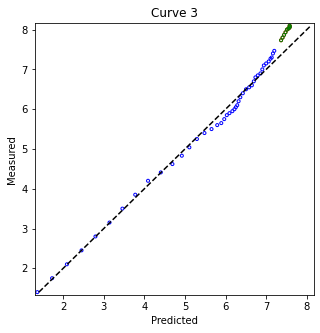

In [133]:
conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 3')




Text(0.5, 1.0, 'Test Curve')

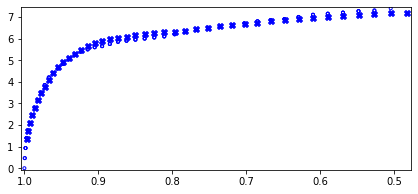

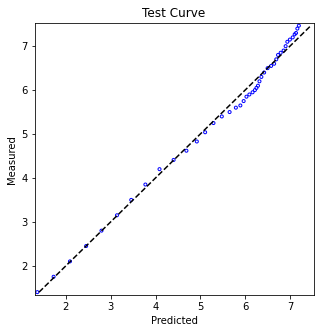

In [134]:
# set curve3 to the test data set
conv_window_t.train_df = train_df_32
conv_window_t.val_df = train_df_32
conv_window_t.test_df = train_df_32

conv_window_t.plot_xy(conv_model,  n_batch=10, dset_name='train' )
plt.gca().set_title('Test Curve')















In [135]:
tr_loss_con_avg = np.mean(train_loss_con)
va_loss_con_avg = np.mean(val_loss_con)
tr_mae_con_avg = np.mean(train_mae_con)
va_mae_con_avg = np.mean(val_mae_con)

#val_performance['linear'] = lstm_model.evaluate(single_step_window.val)
#performance['linear'] = lstm_model.evaluate(single_step_window.test, verbose=0)

In [136]:
tr_perform = {}
va_perform = {}
te_perform = {}

tr_perform['conve']= [tr_loss_con_avg, tr_mae_con_avg]
va_perform['conve']= [va_loss_con_avg, va_mae_con_avg]

In [137]:
tr0 = ttt.iloc[2]['tr']
tr1 = tr0.append(ttt_1.iloc[2]['tr'])
tr2 = tr1.append(ttt_2.iloc[2]['tr'])
tr3 = tr2.append(ttt_3.iloc[2]['tr'])

va0 = ttt.iloc[2]['va']
va1 = va0.append(ttt_1.iloc[2]['va'])
va2 = va1.append(ttt_2.iloc[2]['va'])
va3 = va2.append(ttt_3.iloc[2]['va'])

te0 = ttt.iloc[2]['te']
te1 = te0.append(ttt_1.iloc[2]['te'])
te2 = te1.append(ttt_2.iloc[2]['te'])
te3 = te2.append(ttt_3.iloc[2]['te'])


Text(0.5, 1.0, 'All Curves')

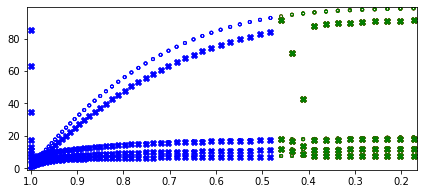

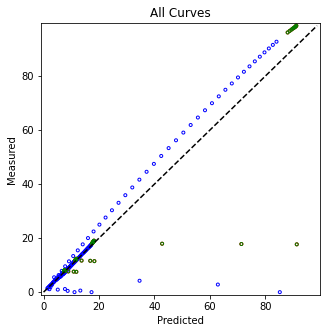

In [138]:
    conv_window_t.train_df = tr3
    conv_window_t.val_df = va3
    conv_window_t.test_df = te3

    conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('All Curves')

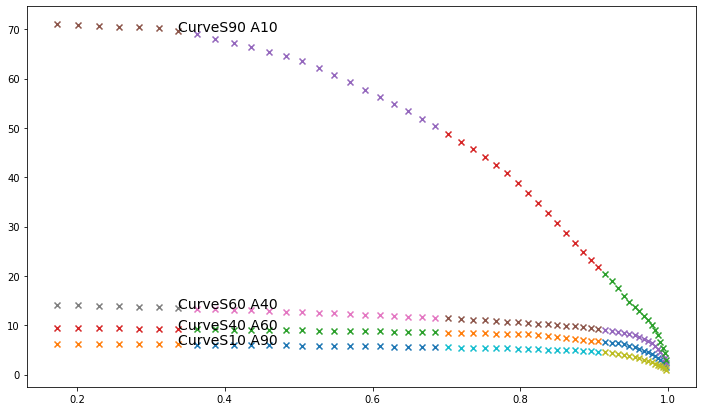

In [139]:
fig, ax2 = plt.subplots(figsize = (12,7))

# curve 4
crv_4 = curve_4.copy()
m = len(crv_4)
#train_df_4 = crv_4[0:int(m)]  #all

train_df_4 = crv_4[0:int(m*0.25)]  #40% 60%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t, set_name='S40 A60', marker2='x', edgecolor2='r')

train_df_4 = crv_4[int(m*0.25):int(m*0.5)]   #60% 40%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S60 A40')

train_df_4 = crv_4[int(m*0.5):int(m*0.75)]  #10% 90%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S10 A90')

train_df_4 = crv_4[ int(m*0.75):int(m*1.00)]  #90% 10%
plots_t.plot_all(train_df_4,  model=conv_model, window_t=conv_window_t,set_name='S90 A10')

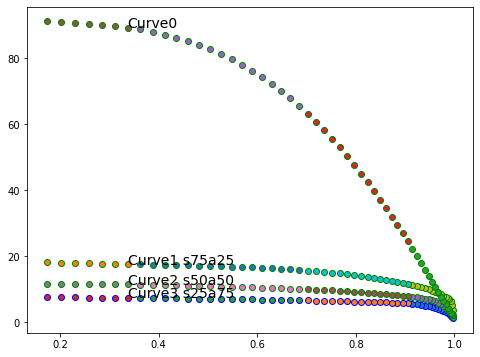

In [140]:
#------------------------------------------
train_df_3 = curve_3.copy()
plots_t.plot_all(train_df_3, set_name='3 s25a75',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='b')

#------------------------------------------
train_df_2 = curve_2.copy()
plots_t.plot_all(train_df_2, set_name='2 s50a50',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='g')
#------------------------------------------
train_df_1 = curve_1.copy()
plots_t.plot_all(train_df_1, set_name='1 s75a25',  model=conv_model,window_t=conv_window_t, marker2='o' , edgecolor2 ='g')

#------------------------------------------

train_df_0 = curve_0.copy()
plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')



#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
        #ax2.set_xlim([plt.xlim()[1], -2.5])
ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------

In [141]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [142]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t

print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (16, 10, 4)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


In [143]:
n=1
for example_inputs, example_labels in wide_conv_window.train.take(200): #1534, 6
#for example_inputs, example_labels in single_step_window.train.take(3):
#for example_inputs, example_labels in wide_window.train.take(2000): #1533 15
  print(n)
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')
  n += 1

1
Inputs shape (batch, time, features): (16, 10, 4)
Labels shape (batch, time, features): (16, 8, 1)
2
Inputs shape (batch, time, features): (4, 10, 4)
Labels shape (batch, time, features): (4, 8, 1)


이제 더 넓은 창에 모델의 예측값을 플롯할 수 있습니다. 첫 번째 예측 전 3개의 입력 타임스텝에 주목하세요. 여기서 모든 예측은 이전 3개의 타임스텝에 기초합니다.

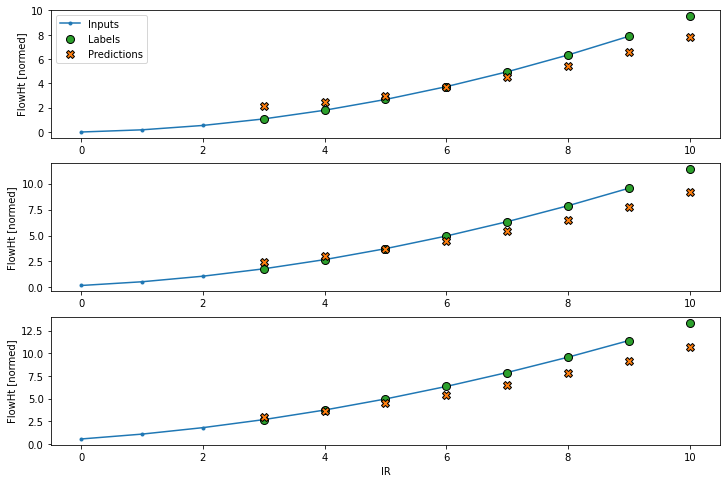

In [144]:
wide_conv_window.plot(conv_model)



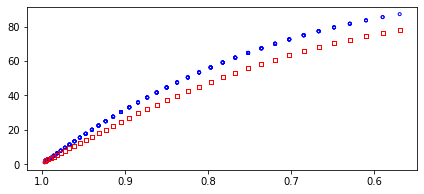

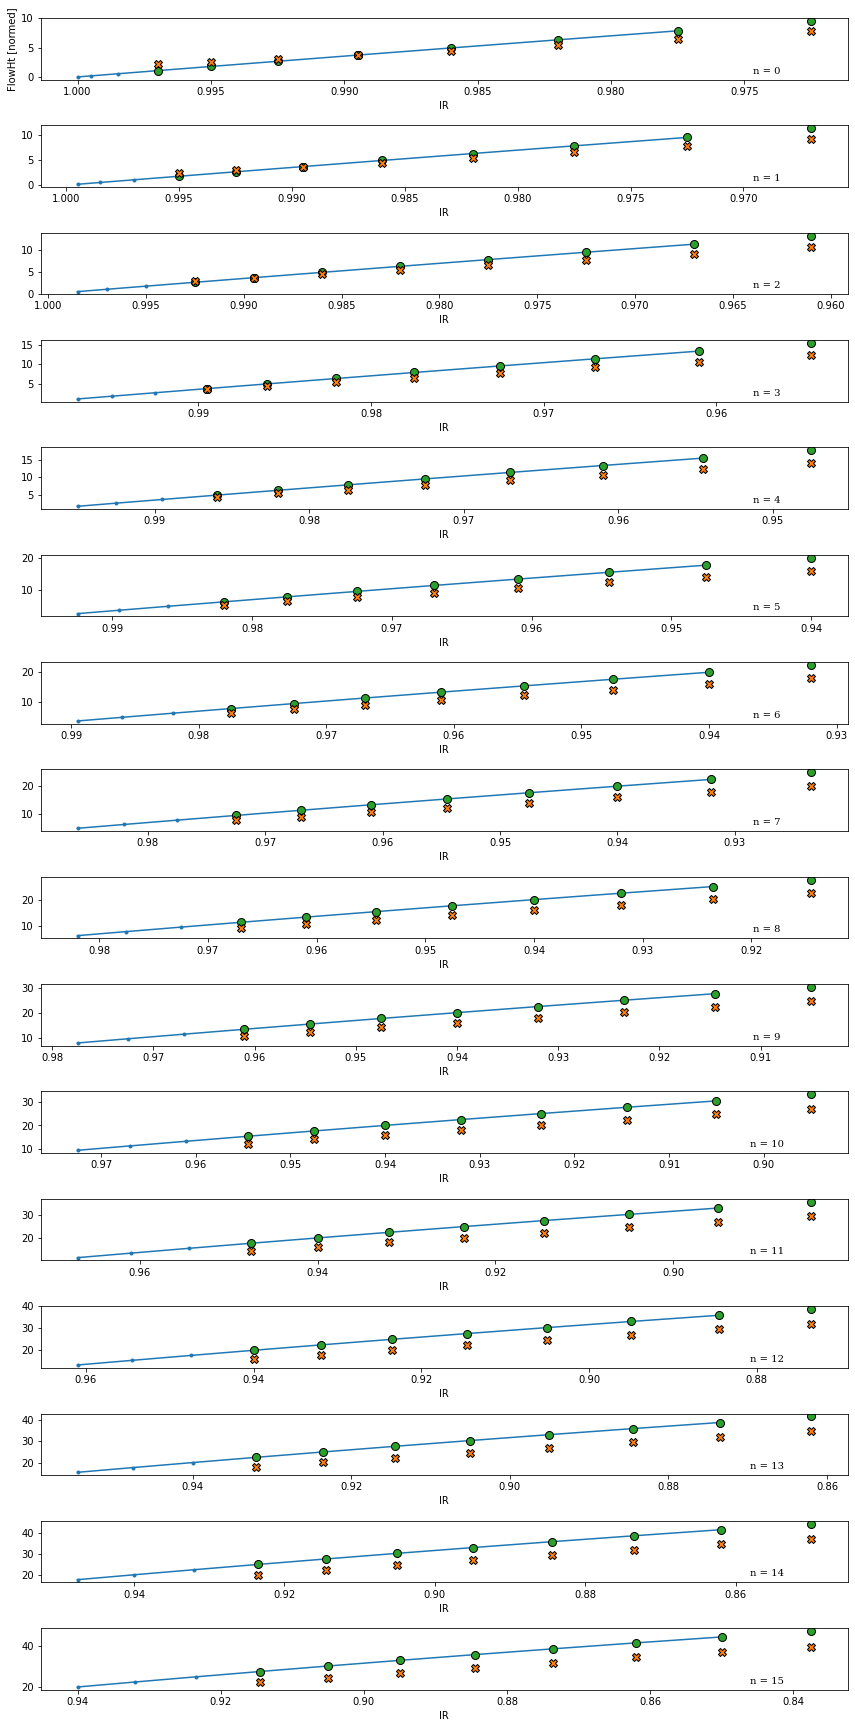

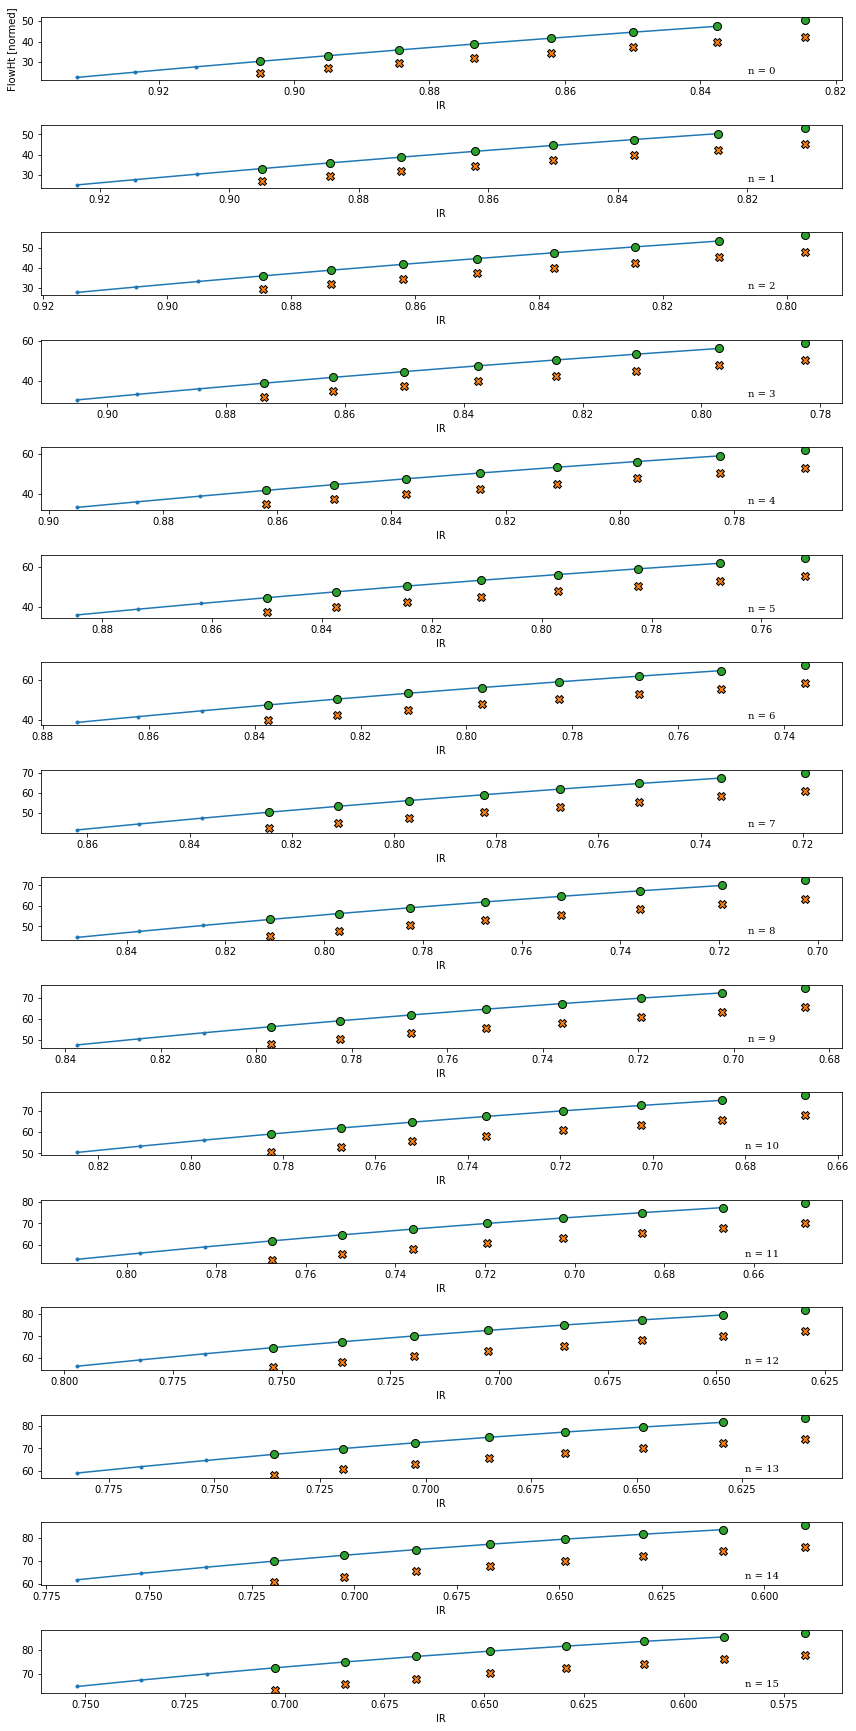

In [145]:
    wide_conv_window_t.train_df = tr3
    wide_conv_window_t.val_df = va3
    wide_conv_window_t.test_df = te3
    wide_conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

#(self, model=None, dset_name=None, plot_col='FlowHt', max_subplots=40, n_batch=None,
#               figures=None, xy_fig=None)

Text(0.5, 1.0, 'Curve 0')

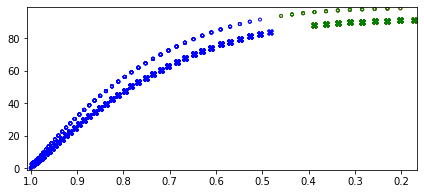

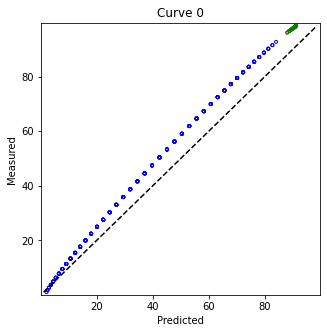

In [146]:
    wide_conv_window_t.train_df = ttt.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt.iloc[2]['va']
    wide_conv_window_t.test_df = ttt.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

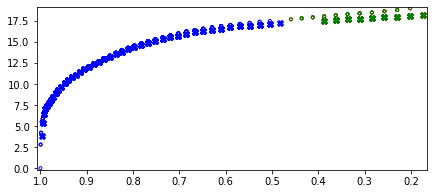

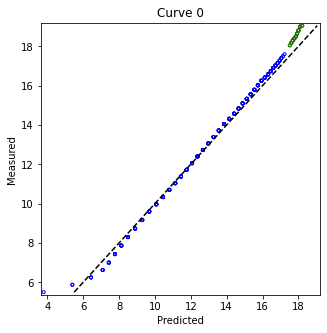

In [147]:
    wide_conv_window_t.train_df = ttt_1.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_1.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_1.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

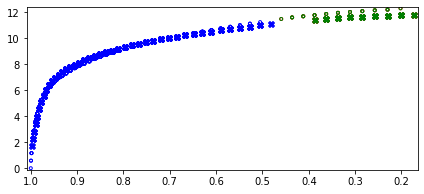

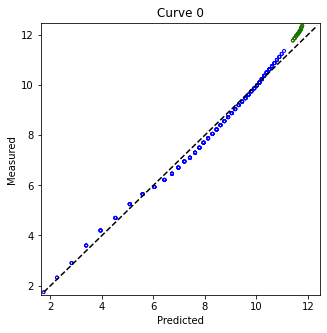

In [148]:
    wide_conv_window_t.train_df = ttt_2.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_2.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_2.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

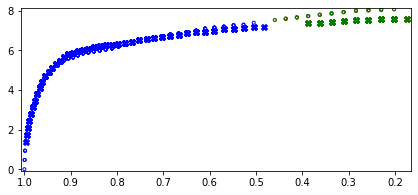

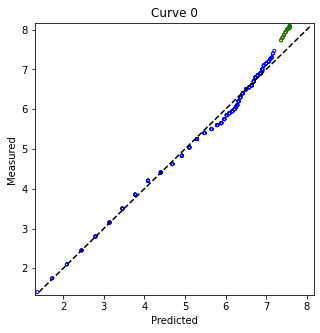

In [149]:
    wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    wide_conv_window_t.val_df = ttt_3.iloc[2]['va']
    wide_conv_window_t.test_df = ttt_3.iloc[2]['te']

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

Text(0.5, 1.0, 'Curve 0')

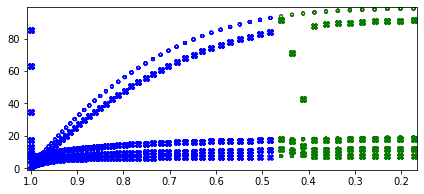

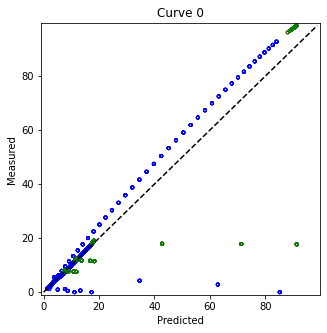

In [150]:
    wide_conv_window_t.train_df = tr3
    wide_conv_window_t.val_df = va3
    wide_conv_window_t.test_df = te3

    wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
    plt.gca().set_title('Curve 0')

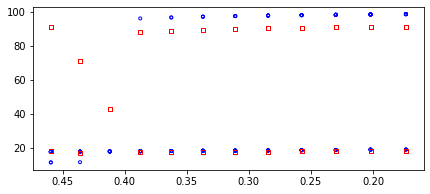

In [151]:
wide_conv_window_t.plot_batch(conv_model, dset_name='test', n_batch =0)

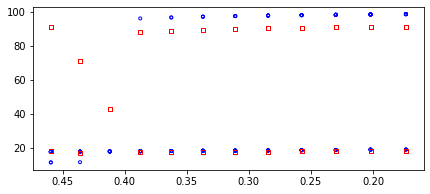

In [152]:
wide_conv_window_t.plot_batch(conv_model, dset_name='val', n_batch =0)


# batch plot

In [217]:
n = len(df)*0.5
#crv_tr = ttt.iloc[2]['tr']
crv_tr = train_df_22
#crv_va = ttt.iloc[2]['va']
crv_va = val_df_22
crv_te = val_df_22

tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []

npat = 50
n_batch = 30

window = conv_window
window_t = conv_window_t
model = conv_model

Text(0.5, 1.0, 'val')

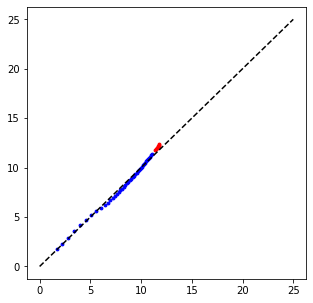

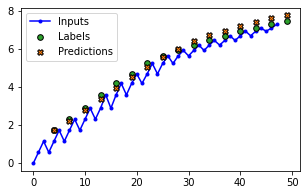

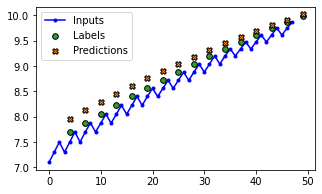

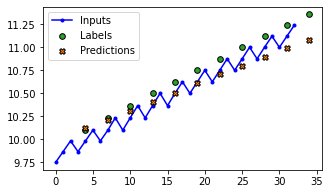

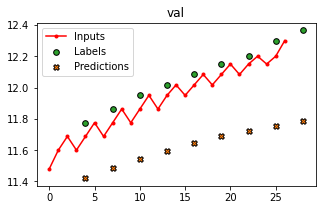

In [218]:
window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

#data = [window_t.train]
data = [window_t.train, window_t.val]

for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(3*len(inputs),4)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(1*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(1*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:3*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[3:3*len(inputs)+1:3], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[3:3*len(inputs)+1:3],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 25], [0, 25], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('val')
plt.gca().set_title(subplot_title)

In [ ]:
def plot_curve3(trg, valg, teg):
    plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Flow Height [m]')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.xlim(0, 1)
    plt.ylim(0, 100)
    plt.legend(loc='best')
    plt.gca().invert_xaxis()


n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

plot_curve3(crv_tr, crv_va, crv_va )

In [ ]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []

va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []

window = wide_window
window_t = wide_window_t
model = lstm_model

npat = 50
n_batch = 30

window.train_df = crv_tr
window.val_df = crv_va

In [ ]:

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))




markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 25], [0, 25], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('train')
plt.gca().set_title(subplot_title)

# Fit any input
### for assumed input data

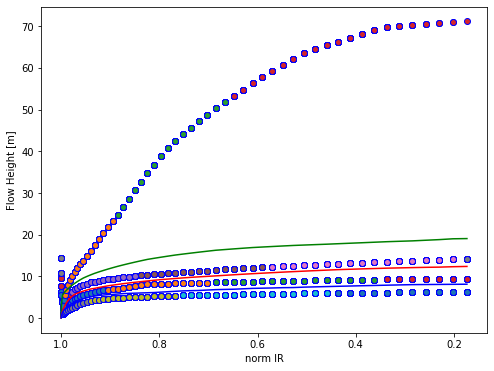

In [153]:
# curve 4
crv_4 = curve_4.copy()

m = len(crv_4)

#train_df_4 = crv_4[0:int(m*0.5)]
#train_df_4 = crv_4[0:int(m*0.25)]
#val_df_4 = crv_4[0:int(m*0.25)]

#train_df_4 = crv_4[ :int(m*1.00)]
train_df_4 = crv_4[ :int(m*1.00)]

#train_df_4 = crv_4[int(m*0.25):int(m*0.5)]
val_df_4 = train_df_4

wide_conv_window_t.train_df = train_df_4
wide_conv_window_t.val_df = val_df_4
wide_conv_window_t.test_df = val_df_4

#wide_conv_window_t.plot_xy(conv_model,  n_batch=20 )
#plt.gca().set_title('Curve4')


dataset = wide_conv_window_t.train

fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
#  print(f'Inputs shape (batch, time, features): {inputs.shape}')
#  print(f'Labels shape (batch, time, features): {targets.shape}')
 # ax2.scatter(lab[:,:,0], targets[:,:,0])
#  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', facecolors='none'
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o'
              , edgecolor ='b')


ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([plt.xlim()[1], -2.5])
#ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',)
#         curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')

wide_conv_window_t.train_df = ttt_3.iloc[2]['tr']
    #.append(ttt_3.iloc[2]['va'])
                        #    .append(ttt_3.iloc[2]['te'])
ax2.invert_xaxis()

## Input estimated from the predict
#### Estmating based on the arbitrary data


In [159]:
df3 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash' ]]

display(df3.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash
0,1.0000,0,0.4,0.6
1,0.9995,1,0.4,0.6
2,0.9985,1,0.4,0.6
3,0.9970,1,0.4,0.6
4,0.9950,1,0.4,0.6


,IR,FlowHt,Sand,Ash
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-4.287758e-16,2.220446e-16,2.679849e-17,-2.679849e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-7.533546e+00,-1.369029e+00,-1.369029e+00
25%,-7.672155e-01,1.321675e-01,-5.989500e-01,-5.989500e-01
50%,2.786256e-01,1.321675e-01,0.000000e+00,0.000000e+00
75%,9.065283e-01,1.321675e-01,5.989500e-01,5.989500e-01
max,1.115497e+00,1.321675e-01,1.369029e+00,1.369029e+00


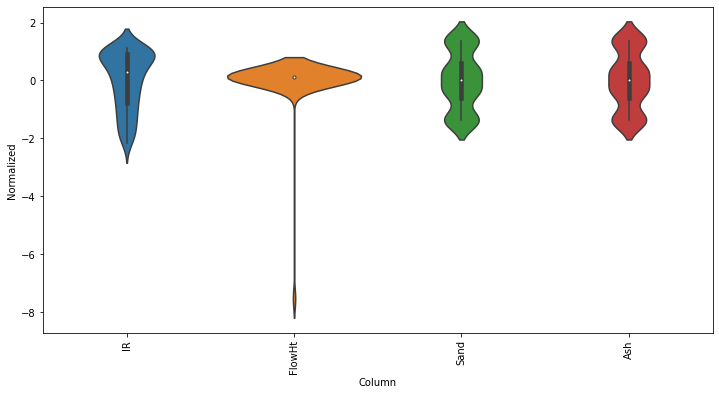

In [160]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()

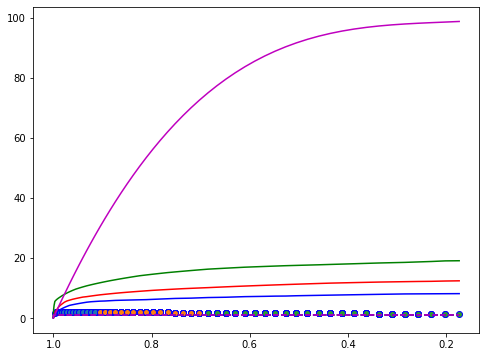

In [161]:
df3_org = df3
#df3 = df3_std_s

#a =ttt_1.iloc[2]['tr']
#b=a.append(ttt_1.iloc[2]['va'])
#c = b.append(ttt_1.iloc[2]['te'])
n = len(df3)
c_0 = df3[0:int(n*0.25)].copy()
c_1 = df3[int(n*0.25):int(n*0.5)].copy()
c_2 = df3[int(n*0.5):int(n*0.75)].copy()
c_3 = df3[int(n*0.75):int(n)].copy()


wide_conv_window_t.train_df = c_0

dataset = wide_conv_window_t.train
fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
  inputs, targets, lab = batch
  predictions = conv_model(inputs)
  ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', edgecolor ='b')
#ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


ax2.invert_xaxis()



## This may be the final!

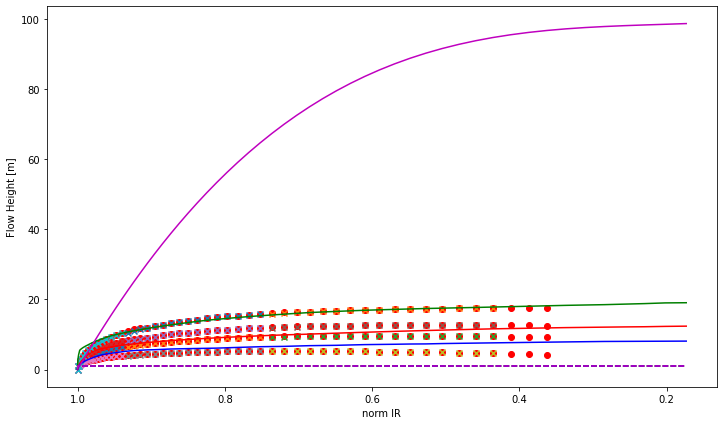

In [168]:
fig, ax2 = plt.subplots(figsize = (12,7))

#------------------------------------------
train_df_3 = curve_3.copy()
#plots_t.plot_all(train_df_3, set_name='3 s25a75',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='b')

#------------------------------------------
train_df_2 = curve_2.copy()
#plots_t.plot_all(train_df_2, set_name='2 s50a50',   model=conv_model,window_t=conv_window_t,marker2='o' , edgecolor2 ='g')
#------------------------------------------
train_df_1 = curve_1.copy()
#plots_t.plot_all(train_df_1, set_name='1 s75a25',  model=conv_model,window_t=conv_window_t, marker2='o' , edgecolor2 ='g')

#------------------------------------------

train_df_0 = curve_0.copy()
#plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')


#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
        #ax2.set_xlim([plt.xlim()[1], -2.5])
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 3
label_width = 1
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]
train_df_40 = c_0  #4060
train_df_41 = c_1  #6040
train_df_42 = c_2  #1090
train_df_43 = c_3  #9010

CONV_WIDTH = 3
m1 = total_window_size-CONV_WIDTH
m = CONV_WIDTH-1

data_set = [train_df_40, train_df_41, train_df_42, train_df_43  ]
#data_set = [train_df_41, train_df_42, train_df_43  ]
#data_set = [train_df_43]

for data in data_set :
    #data = np.array(data, dtype=np.float32)
    #data = tf.convert_to_tensor(data, dtype=tf.float32)

#    conv_window_t.train_df = data
#    ds = conv_window_t.train
    wide_conv_window_t.train_df = data
    ds = wide_conv_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        if i>0 :
            #for j in range (0, CONV_WIDTH-1) :
            #    inputs[j, 0:CONV_WIDTH-j, 1] = inputs_res[-1:, j-CONV_WIDTH: , 1]
            inputs[0,:,1] = inputs_res[-1:,:,1]
        for n in range (len(inputs)-1) :
            if n > 0 : inputs = inputs_res
            predictions = conv_model(inputs[n:n+1])
            predictions = predictions.numpy()

            inputs[n+1, 0:CONV_WIDTH-1, 1] = inputs[n, 1:CONV_WIDTH, 1]
            inputs[n+1, CONV_WIDTH-1:, 1] = predictions[0, :, 0]
            inputs_res = inputs


        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        predictions = conv_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='o', edgecolors=None, label='Predictions'
             ,facecolors='red'  )# , c='#ff7f0e', s=64)
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='x')



ax2.invert_xaxis()


In [165]:
print("wide_conv_window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


wide_conv_window
Input shape: (16, 10, 4)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


In [166]:
inputs.shape
wide_conv_window_t
conv_window_t


Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']